In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5py.File("/juno/group/muj_senssearch_dataset/multimodal_op_space_0017.h5", 'r', swmr=True, libver = 'latest')

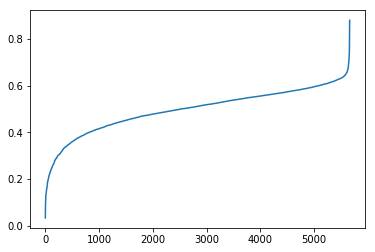

143645
827479


In [12]:
contact_sum = 0
total_points = 0
dist_list = []
for i in range(1,5666):
    if i == 1883 or i == 3773:
        continue
    filename = "/juno/group/muj_senssearch_dataset/multimodal_op_space_" + str(i).zfill(4) + ".h5"
    f = h5py.File(filename, 'r', swmr=True, libver = 'latest')
    contact_sum += np.array(f['contact']).sum()
    total_points += np.array(f['contact']).shape[0]
    proprio = np.array(f['proprio'])[:,0:3]
    proprio_diff = proprio[1:] - proprio[:-1]
    dist_list.append(np.linalg.norm(proprio_diff, axis = 1).sum())
    
    if np.linalg.norm(proprio_diff, axis = 1).sum() < 0.01:
        print(filename)
    
    f.close()

dist_list.sort()
plt.plot(range(len(dist_list)), dist_list)
plt.show()

print(contact_sum)
print(total_points)

In [3]:
f.keys()

<KeysViewHDF5 ['action', 'contact', 'depth', 'force', 'image', 'joint_pos', 'joint_vel', 'proprio']>

In [4]:
for key in f.keys():
    print(key, f[key].shape)

action (200, 3)
contact (200,)
depth (200, 128, 128)
force (200, 6)
image (200, 3, 128, 128)
joint_pos (200, 7)
joint_vel (200, 7)
proprio (200, 12)


In [5]:
f['image'].shape

(200, 3, 128, 128)

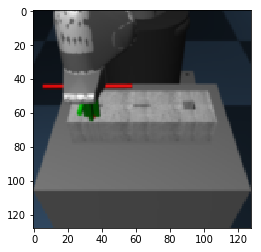

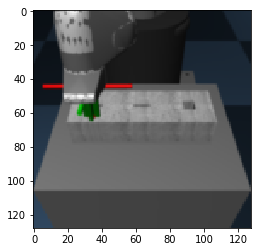

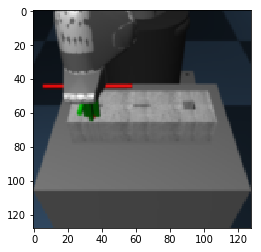

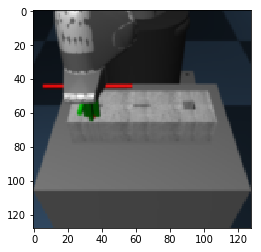

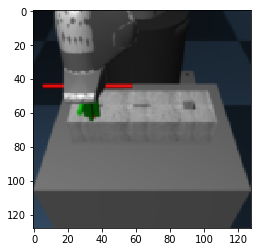

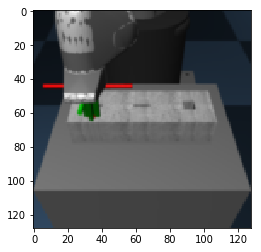

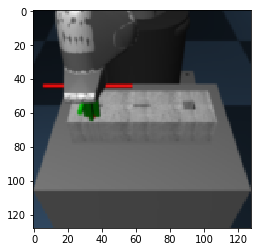

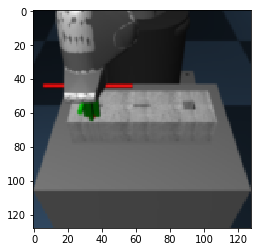

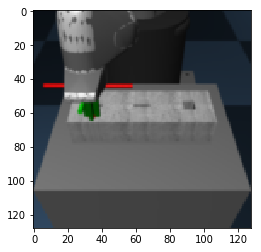

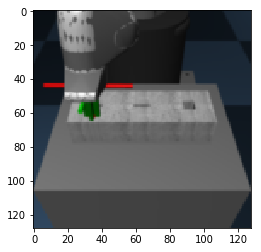

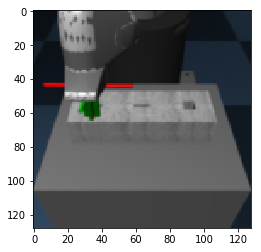

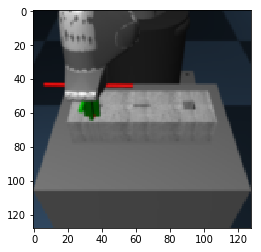

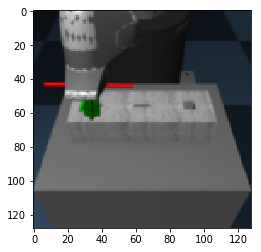

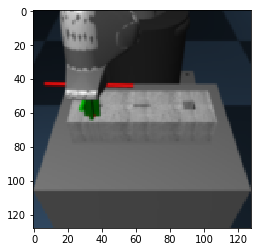

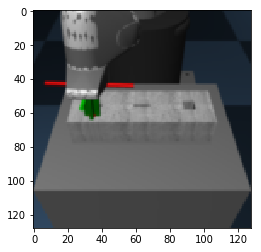

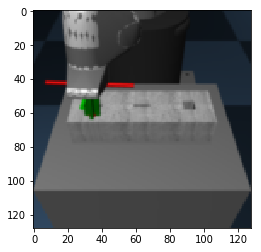

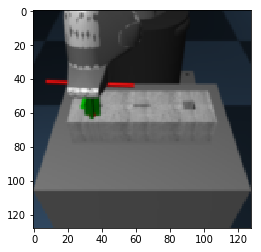

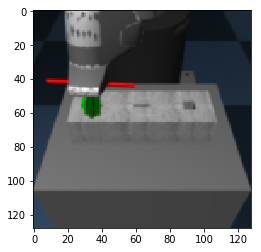

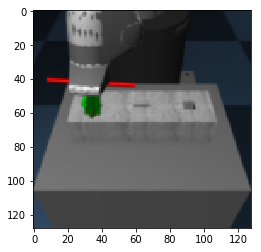

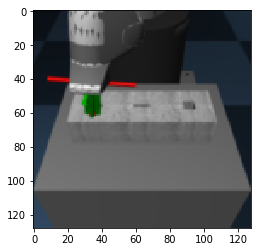

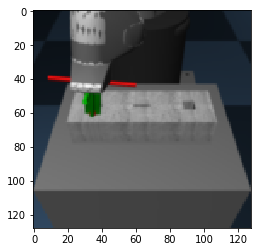

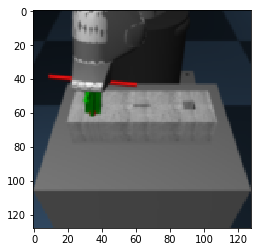

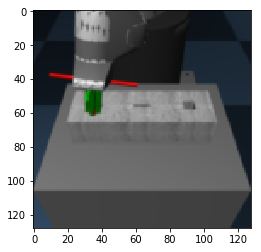

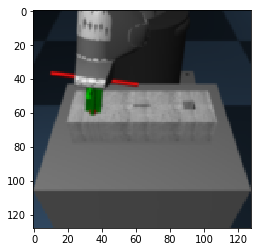

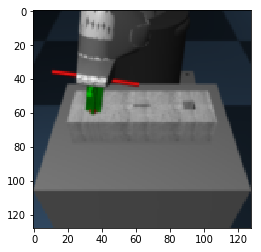

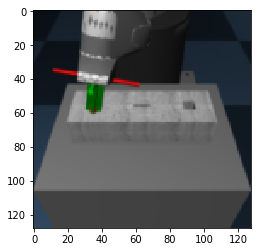

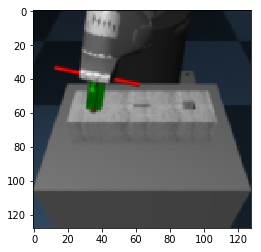

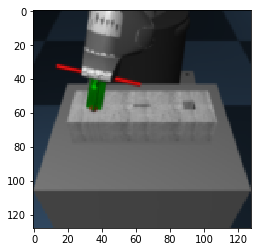

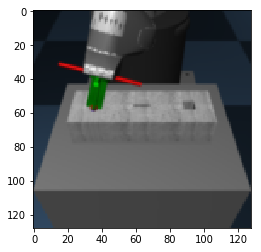

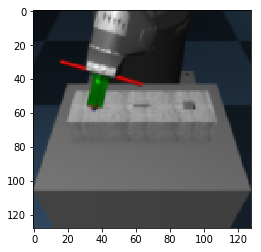

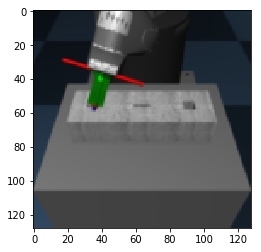

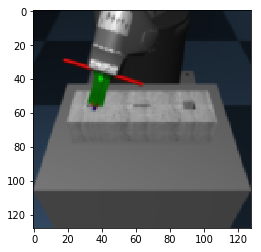

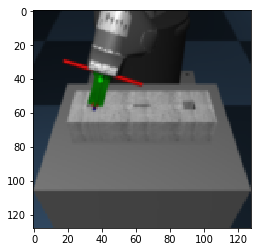

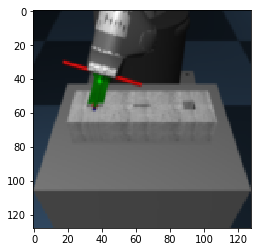

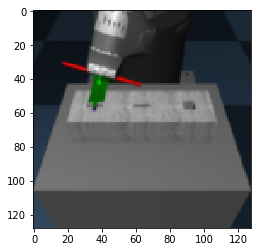

In [45]:
for n in range(40,75):
    plt.imshow(f['image'][n].transpose((2,1,0)))
    plt.show()

In [7]:
f['depth'].shape

(200, 128, 128)

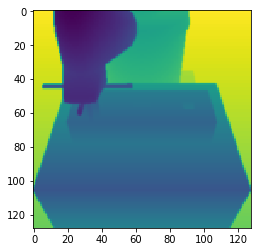

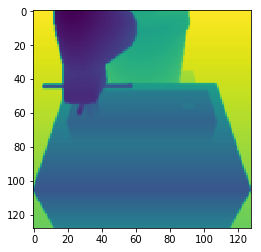

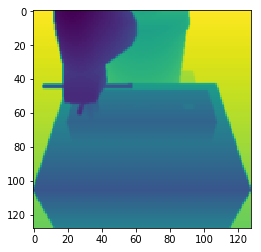

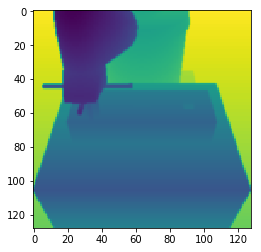

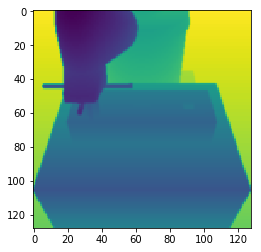

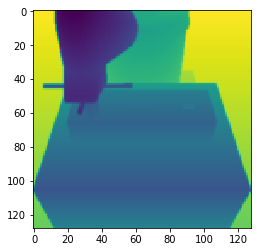

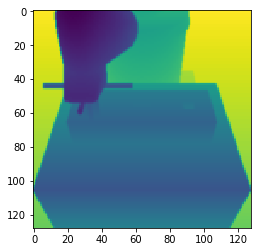

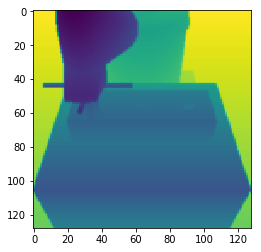

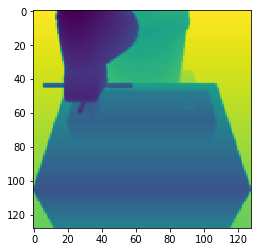

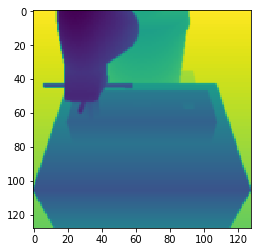

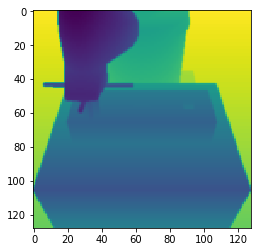

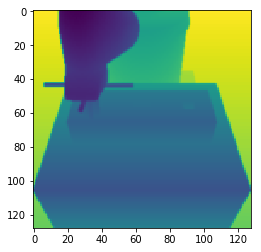

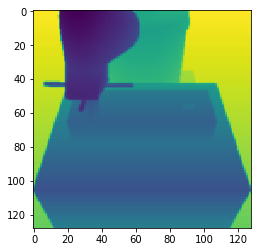

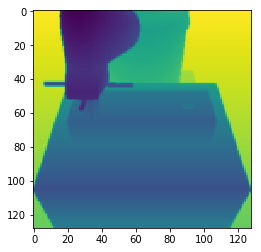

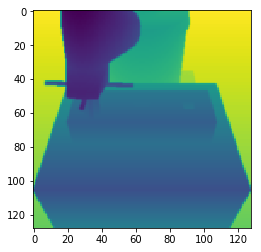

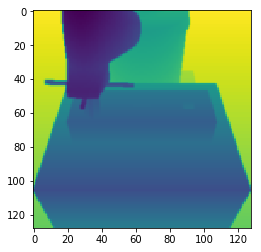

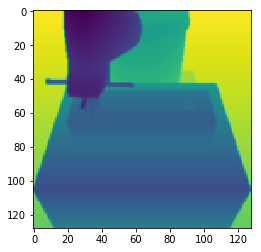

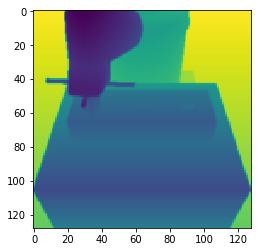

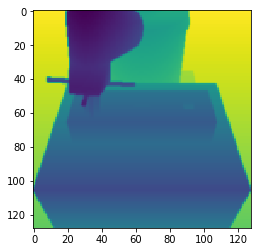

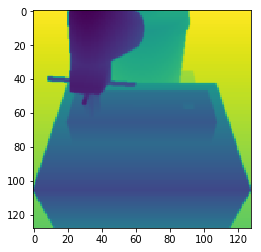

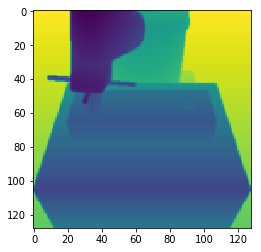

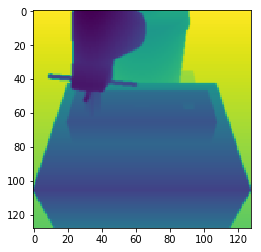

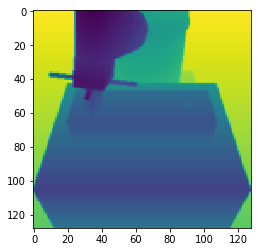

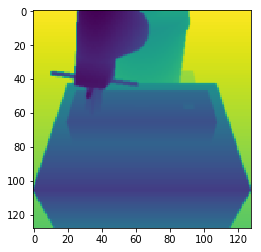

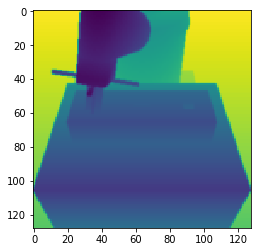

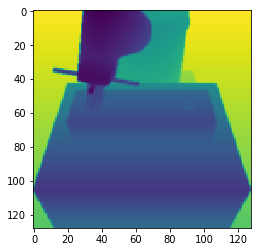

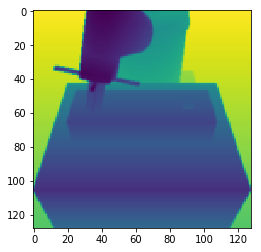

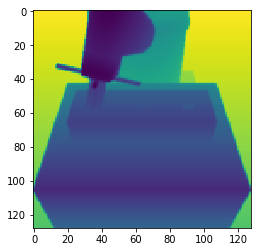

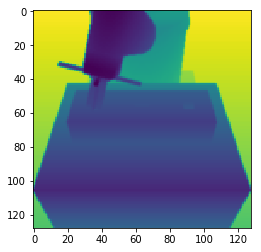

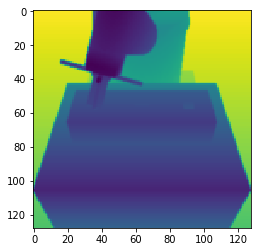

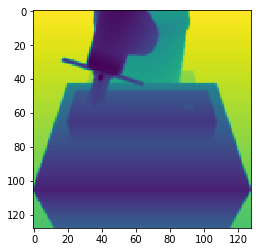

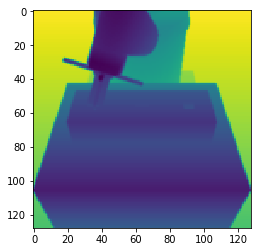

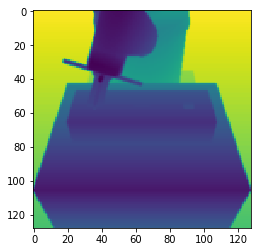

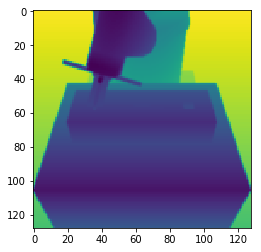

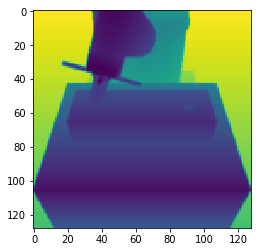

In [44]:
for n in range(40,75):
    plt.imshow(f['depth'][n])
    plt.show()

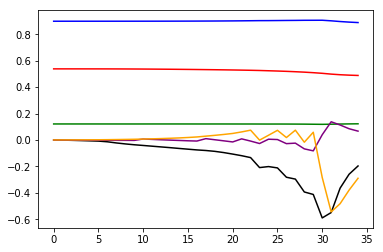

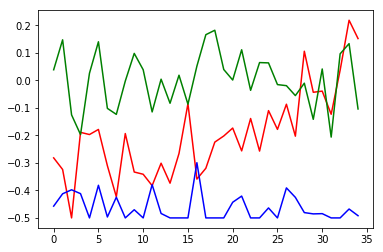

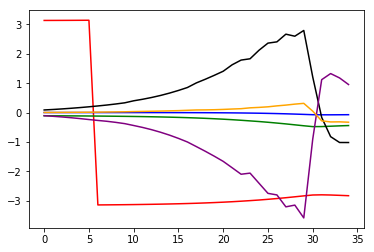

In [43]:
min_idx = 40
max_idx = 75
array_1 = np.array(f['proprio'])[min_idx:max_idx]
array_2 = np.array(f['action'])[min_idx:max_idx]
color = ['r', 'g', 'b', 'k', 'purple', 'orange']
for idx, n in enumerate(range(6)):
    plt.plot(range(array_1.shape[0]), array_1[:, n], color = color[idx])
plt.show()
for idx, n in enumerate(range(3)):
    plt.plot(range(array_2.shape[0]), array_2[:, n], color = color[idx])
plt.show()
for idx, n in enumerate(range(6,12)):
    plt.plot(range(array_1.shape[0]), array_1[:, n], color = color[idx])
plt.show()

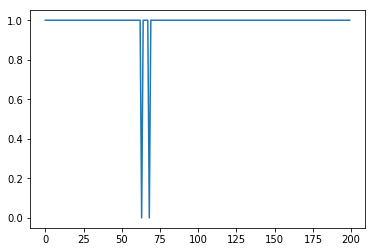

In [46]:
plt.plot(f['contact'])

In [11]:
f.close()